# Gym Client Intake: 
# Assessing Needs and Assigning Training Partners

### Given a set of intake forms, I use text analysis methods to understand clients better and to pair similar clients as training partners.

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
import re

##### The data I am using are client intake forms from a gym. The client enters the reasons they are working out at the gym and the trainer can create a program and find an appropriate workout partner for them. 

In [171]:
intakes = pd.read_csv('./docs_df.csv', index_col=0)

##### This function takes the dataframe as input and returns a list of docs

In [172]:
def get_docs(dataframe):
    return list(intakes.iloc[:,0])

docs = get_docs(intakes)

##### Let's look at the first doc. it's messy! I'm starting at element 1000 to remove identifying information

In [173]:
docs[0][1000:]

"w times a week, \n_bu_t_ _I_ d_o_n_'t_ _t_h_in_k_ _I_ l_i_f_t _e_f_f_ec_t_i_v_el_y_ _f_or_ _m_us_c_l_e_ g_r_o_w_th___________________DocuSign Envelope ID: 1C593805-3764-47AB-8954-CC4CB30911D7\nsee above\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_________________________________________ \n \n \n10. Please list any current or past bodily injuries you have or have had in the \npast: \nstress fractures from running years back\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n______________________________________________

##### Let's take about the part before and after the questions answered

In [174]:
def remove_beg_and_end(doc):
    q1 = re.compile('1\..+Session', re.DOTALL)
    return q1.findall(doc)[0][:-12] #This slice removes the first word of the 'end' part

In [175]:
docs2 = []

for doc in docs:
    d = remove_beg_and_end(doc)
    docs2.append(d)

In [176]:
docs2[0][1000:]

"__________________________\n_____________________________________________________________\n_________________________________________ \n \n \n10. Please list any current or past bodily injuries you have or have had in the \npast: \nstress fractures from running years back\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_________________________________________ \n \n \n11. Please list any current or past illnesses that have or have had in the past: \nnone\n_____________________________________________________________\n_____________________________________________________________\n____________________

##### Next I remove the initial questions about contact so I can be left with just the history and goals related to training.

In [177]:
def split_docs(doc):
    pattern = '9\.\s*Please describe your overall .*?possible:'
    
    longform = re.findall(pattern + '.*', doc, re.DOTALL)[0]
    details = re.findall('^.*?' + pattern, docs2[0], re.DOTALL)[0][:-88]
    
    return details, longform

In [178]:
details = []
longforms = []
for d in docs2:
    detail, longform = split_docs(d)
    details.append(detail)
    longforms.append(longform)

In [179]:
longforms[0]

"9.  Please describe your overall fitness goals. Please be as descriptive as \npossible: \nI want to gain muscle mass. I have had a really hard time putting on actual \n_____________________________________________________________\nmuscle mass. I currently eat between 2800 and 3200 calories a day. I do about\n 40 minutes of cardio 6 days a week and lift at the gym a few times a week, \n_bu_t_ _I_ d_o_n_'t_ _t_h_in_k_ _I_ l_i_f_t _e_f_f_ec_t_i_v_el_y_ _f_or_ _m_us_c_l_e_ g_r_o_w_th___________________DocuSign Envelope ID: 1C593805-3764-47AB-8954-CC4CB30911D7\nsee above\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_____________________________________________________________\n_________________________________________ \n \n \n10. Please list any current or past bodily injuries you have

##### For legibility, I remove newlines, and ____ blanks in addition to a Docusign Stamp


In [180]:
def remove_clutter(doc):
    doc = doc.replace('\n','').replace('_','')
    pattern = re.compile('DocuSign Envelope ID: ([0-9]?-?[A-Z]?)*') #remove this docusign stamp
    newdoc = re.sub(pattern, '', doc)
    return newdoc

In [181]:
longclean = []

for d in longforms:
    newd = remove_clutter(d)
    longclean.append(newd)
    

In [182]:
longclean[0]

"9.  Please describe your overall fitness goals. Please be as descriptive as possible: I want to gain muscle mass. I have had a really hard time putting on actual muscle mass. I currently eat between 2800 and 3200 calories a day. I do about 40 minutes of cardio 6 days a week and lift at the gym a few times a week, but I don't think I lift effectively for muscle growthsee above   10. Please list any current or past bodily injuries you have or have had in the past: stress fractures from running years back   11. Please list any current or past illnesses that have or have had in the past: nonenone   12. Please list any information about you that you feel we should know about: I really want to do things I can't do on my own. I go to the gym, so I can do light DB presses or push ups or skull crushers, etc, by myself. I really can't squat, deadlift a ton of weight, pull ups, chest press, etc by myself, so I want to lean into those types of things   13. Please list any medications you are curr

##### I want to remove the last question because although important to marketing, it's not important to training

In [183]:
def remove_last_prompt(doc):
    pattern = re.compile('15\.\s*How did you hear about BUF\?.*', re.DOTALL) 
    newdoc = re.sub(pattern, '', doc)
    return newdoc

longclean1 = []

for d in longclean:
    newd = remove_last_prompt(d)
    longclean1.append(newd)

In [184]:
longclean1[0]

"9.  Please describe your overall fitness goals. Please be as descriptive as possible: I want to gain muscle mass. I have had a really hard time putting on actual muscle mass. I currently eat between 2800 and 3200 calories a day. I do about 40 minutes of cardio 6 days a week and lift at the gym a few times a week, but I don't think I lift effectively for muscle growthsee above   10. Please list any current or past bodily injuries you have or have had in the past: stress fractures from running years back   11. Please list any current or past illnesses that have or have had in the past: nonenone   12. Please list any information about you that you feel we should know about: I really want to do things I can't do on my own. I go to the gym, so I can do light DB presses or push ups or skull crushers, etc, by myself. I really can't squat, deadlift a ton of weight, pull ups, chest press, etc by myself, so I want to lean into those types of things   13. Please list any medications you are curr

In [185]:
#These are all the prompts that are asked in the intake forms.
#I only want the client responses so I will take out the questions.

prompts = [
    '1\.\s*Name:',
    '2\.\s*Age:',
    '3\.\s*Height:',
    '4\.\s*Weight:',
    '5\.\s*Birthday:',
    '6\.\s*Email:',
    '7\.\s*Occupation:',
    '8\.\s*Address:',
    '9\.\s*Please describe your overall .*?possible:',
    '10\.\s*Please list any current or past bodily injuries you have or have had in the past:',
    '11\.\s*Please list any current or past illnesses that have or have had in the past:',
    '12\.\s*Please list any information about you that you feel we should know about:',
    '13\.\s*Please list any medications you are currently taking:',
    '14\.\s*Have you had training in the past\? If yes, what made you stop\?',
    #'15\.\s*How did you hear about BUF\?' I removed this part in earlier step
]

In [186]:
#This removes the prompts
def remove_prompts(doc):
    result = doc
    for p in prompts:
        pattern = p
        result = re.sub(pattern, '', result)
    
    return result

In [187]:
longclean2 = []

for d in longclean1:
    newd = remove_prompts(d)
    longclean2.append(newd)

In [188]:
#Here I am finishing with some extra cleanups for mistypings I saw while coding
def extra_cleaning(doc): 
    result = doc.lower().replace('pull ups', 'pull-ups').replace('push ups', 'push-ups')\
                            .replace('skull crushers','skullcrushers').replace('growthsee', 'growth see')
    result2 = result.replace('n/a', '').replace('none','').replace(' na ', '')
    return result2

In [189]:
longclean3 = []
for d in longclean2:
    newd = extra_cleaning(d)
    longclean3.append(newd)

In [190]:
stopwords = {"i'm", 'while', "you're", 'by', "where's", "i'd", "can't", "she'd", 'an', 'does', 'who', 'but', 'would', 'there', 'am', 'too', 'such', 'hers', "mustn't", 'most', "i'll", 'further', 'because', 'be', "here's", 'not', "they'd", 'we', "when's", "shouldn't", 'yourselves', 'to', 'from', 'that', 'out', 'between', "you've", 'her', 'it', 'the', 'their', 'each', "don't", "we'll", 'under', 'then', "i've", "you'll", 'only', 'here', 'up', "won't", "who's", 'with', 'him', 'have', 'ought', 'through', "wouldn't", 'a', 'into', "haven't", 'ourselves', "we've", 'them', 'during', 'on', 'few', 'same', 'and', "there's", "what's", 'what', 'yours', 'could', "she's", 'more', 'after', 'do', 'they', 'for', 'being', "didn't", 'nor', 'before', 'than', "that's", 'over', 'doing', 'did', 'his', "let's", "they've", "isn't", "we'd", 'been', 'has', "aren't", 'so', 'again', 'i', 'she', 'themselves', "they're", 'until', "shan't", 'down', "wasn't", 'about', 'himself', 'against', 'where', 'once', 'those', 'very', "hadn't", 'or', 'herself', "doesn't", "we're", 'our', 'if', 'he', 'theirs', 'no', 'how', 'other', "how's", 'above', 'were', 'was', "why's", 'its', 'at', 'your', 'these', 'own', 'any', "couldn't", 'yourself', "he's", 'you', 'should', 'below', 'my', 'off', "they'll", 'myself', 'some', 'of', 'are', "she'll", 'is', 'which', "he'll", 'this', 'all', 'me', 'whom', 'both', 'having', "hasn't", 'as', "it's", 'ours', "weren't", "you'd", "he'd", 'when', 'had', 'cannot', 'in', 'itself', 'why'}

In [191]:
def create_bow(doc):
    pattern = re.compile('[\.,!\?]')
    result = re.sub(pattern, '', doc.lower())
    result2 = [word for word in result.split() if word not in stopwords]
    
    return set(result2)

In [192]:
bows = []

for d in longclean3:
    bow = create_bow(d)
    bows.append(bow)

In [193]:
bows[0]

{'2800',
 '3200',
 '40',
 '6',
 'actual',
 'back',
 'calories',
 'can',
 'cardio',
 'chest',
 'closed',
 'currently',
 'day',
 'days',
 'db',
 'deadlift',
 'eat',
 'effectively',
 'etc',
 'fractures',
 'gain',
 'go',
 'growth',
 'gym',
 'hard',
 'lean',
 'lift',
 'light',
 'lol',
 'mass',
 'minutes',
 'muscle',
 'press',
 'presses',
 'pull-ups',
 'push-ups',
 'putting',
 'really',
 'running',
 'see',
 'skullcrushers',
 'squat',
 'stress',
 'things',
 'think',
 'time',
 'times',
 'ton',
 'types',
 'wait',
 'want',
 'week',
 'weight',
 'years'}

In [194]:
from collections import Counter
def count_freq(bow_list):
    total = Counter()
    
    for i in bow_list:
        total += Counter(i)
        
    return Counter(total)

In [195]:
word_freq = count_freq(bows)

print("Top 20 (word, frequency) pairs:")
most_common = word_freq.most_common(20)
print(most_common)

print("Bottom 20 (word, frequency) pairs:")
least_common = word_freq.most_common()[-20:]
print(least_common)


Top 20 (word, frequency) pairs:
[('muscle', 71), ('get', 57), ('body', 49), ('weight', 48), ('like', 48), ('back', 47), ('es', 46), ('lose', 46), ('want', 44), ('training', 42), ('gain', 41), ('fat', 41), ('also', 38), ('years', 34), ('work', 34), ('build', 29), ('strength', 29), ('time', 27), ('trainer', 27), ('overall', 27)]
Bottom 20 (word, frequency) pairs:
[('wrestling', 1), ('loud', 1), ('noises', 1), ('scheduling', 1), ('proportionate', 1), ('wirh', 1), ('replicate', 1), ('minicus', 1), ('balls', 1), ('nce', 1), ('ground', 1), ('strengthooking', 1), ('spasm', 1), ('budgetary', 1), ('pandemicooking', 1), ('illnessesother', 1), ('sporadically', 1), ('happen', 1), ('now)', 1), ('(controlled', 1)]


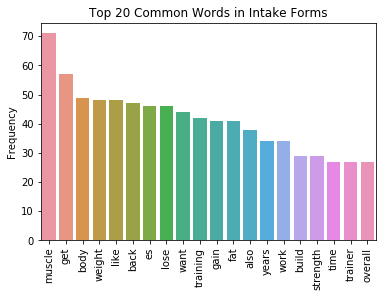

In [196]:
words = list(dict(most_common).keys())
vals = list(dict(most_common).values())
plt.figure()
plt.title('Top 20 Common Words in Intake Forms')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
g = sns.barplot(x=words, y=vals)

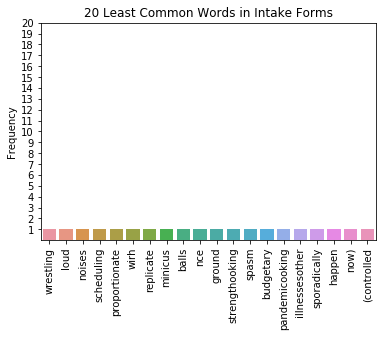

In [197]:
words = list(dict(least_common).keys())
vals = list(dict(least_common).values())
fig, ax = plt.subplots()
plt.title('20 Least Common Words in Intake Forms')
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
g = sns.barplot(x=words, y=vals)
g.set_yticks(range(1,21))

### Now using some tools from calculating document similarity, let's find best partners for each client

In [198]:
#this creates an overall vocab vector that contains 
#all possible words used by clients (minus stopwords)

def create_vocab(bows):
    assert isinstance(bows, list), "create_vocab expects a list as input."
    
    words = []
    
    for bow in bows:
        words += list(bow)
    #print(words)
    result = sorted(list(set(words)))

    return result

#This turns each word_list into a sparse vector with 1 or 0
#if they do or do not include a word from the vocab vector
def bagofwords(bows, vocab):
    assert (isinstance(bows, list)), "bagofwords expects a list of strings as input for doclist."
    assert (isinstance(vocab, list)), "bagofwords expects a list of strings as input for vocab."
    
    all_bags = []
    
    for bow in bows:
        words = bow
        bag = [0] * len(vocab)

        for word in words:
            ind = vocab.index(word)
            bag[ind] += 1
        all_bags.append(bag)
    
    return all_bags

#This normalizes each vectorized bow to control for overly weighting documents with more words
from math import sqrt
def bow_normalize(bow):
    assert(isinstance(bow,list)),"bow_normalize expects a list of ints as input"
    
    newbow = []
    
    for vector in bow:
        euclidean = sqrt(sum(xi**2 for xi in vector))
        newvec = [xi/euclidean for xi in vector]
        newbow.append(newvec)
    
    return newbow

#This creates a "SCORE" calculation to be used in the next function
def inner_product(a,b):
    assert (isinstance(a, list)), "inner_product expects a list of floats/ints as input for a."
    assert (isinstance(b, list)), "inner_product expects a list of floats/ints as input for b."
    assert len(a) == len(b), "inner_product should be called on vectors of the same length."
    
    total = 0.0
    
    for ai, bi in zip(a,b):
        total += ai*bi
    
    return total

#This compares each vectorized bow to all the other bows for similarity 
#using the inner product function above
def most_similar(nbows, target):
    assert (isinstance(nbows,list)), "most_similar expects list as input for nbows."
    assert (isinstance(target,int)), "most_similar expects integer as input for target."
    
    highest_sim = 0
    least_ind = 1000000
    
    for ind, bow in enumerate(nbows):
        sim = inner_product(bow, nbows[target])
        #print(sim)
        if (sim > highest_sim) & (ind != target):
            highest_sim = sim
            least_ind = ind
        elif (sim == highest_sim) & (ind != target):
            if ind < least_ind: least_ind = ind

    return least_ind



#### One of the vectors was blank, and threw a bug in the code. I am removing it.

In [199]:
for ind, i in enumerate(bows):
    if len(i)==0:
        print(ind)

106


In [200]:
bows[106]

set()

In [201]:
if len(bows[106])==0:
    del bows[106]

##### Finally I use all my functions to sift through all clients and find the best partner for each

In [202]:
from collections import defaultdict
vocab = create_vocab(bows)
bags = bagofwords(bows, vocab)
nbows = bow_normalize(bags)

most_sim = defaultdict()

for ind, nbow in enumerate(nbows):
    similar_index = most_similar(nbows, ind)
    most_sim[ind] = similar_index

In [203]:
for i in range(5):
    print(i, ':', most_sim[i])

0 : 30
1 : 8
2 : 23
3 : 99
4 : 74


In [204]:
#Let's look at some similar partners:
print("Partner 0's words:")
print()
print(','.join(bows[0])) 
print()
print("Partner 30's words:")
print()
print(','.join(bows[30]))

Partner 0's words:

chest,want,squat,deadlift,lol,cardio,currently,etc,2800,closed,years,presses,hard,running,wait,stress,growth,muscle,days,back,push-ups,eat,effectively,mass,actual,gym,skullcrushers,calories,minutes,go,weight,putting,3200,really,think,time,fractures,6,press,types,day,lift,times,see,week,db,40,ton,lean,pull-ups,light,can,gain,things

Partner 30's words:

seems,body,job,sufficient,area,mind,past,moving,whole,metabolism,definitely,overall,something,plan,like,muscle,4-5,particular,workout,cities,eat,develop,es,target,mass,focus,gym,calories,go,still,need,keep,also,think,changing,sertraline,now,times,new,week,struggled,possibly,narrowing,starting,can,gain


In [205]:
print("Partner 1's words:")
print()
print(','.join(bows[1])) 
print()
print("Partner 8's words:")
print()
print(','.join(bows[8]))

Partner 1's words:

bigger,train,metabolism,recovery,pandemic,biggest,fitness,well,2021,illnesses,muscle,building,vegas,continue,back,just,love,arms,2020,due,excited,es,fast,trainer,balance,onaesthetically,le,pack,firming,goals,prep,6,retain,worked,butt,september,lean,challenge,nyc,toned,relocating,toning,injuries

Partner 8's words:

6,packs,body,tonedlose,trainer,get,fit,invested,arms,fatget,es,muscular,stopped


In [206]:
print("Partner 2's words:")
print()
print(','.join(bows[2])) 
print()
print("Partner 23's words:")
print()
print(','.join(bows[23]))

Partner 2's words:

exercises,great,practically,moving,area,looking,learn,physical,fitness,stop,overall,gaining,muscle,positive,secondary,sessions,interested,build,due,excited,working,gym,weight,brief,'ve,beginner,goal,/a,experience,stamina,strengthening,general,losing,absolute

Partner 23's words:

currently,moved,overall,unwantedly,gaining,back,country,es,strength/a,mass,gym,weight,also,/a,year,losing,new,totally,gain


In [207]:
print("Partner 3's words:")
print()
print(','.join(bows[3])) 
print()
print("Partner 99's words:")
print()
print(','.join(bows[99]))

Partner 3's words:

someone,exercises,body,got,pain,lower,years,fitness,lot,like,back,injury,eat,just,stronger,lose,get,never,weight,teaching,started,goals,formal,trained,training,proper,lazy,now,way,many,stopped

Partner 99's words:

want,thinner,got,etc,chaotic,glutes,shoulders,workouts,told,like,muscle,sessions,back,tear,complimentary,regular,realistic,gym,never,think,really,core,training,cross-fit,sometimes,productive,lifting,cardio,high,lower,years,thighs,place,iam,meniscus,building,knee,injury,stronger,increasing,felt,focus,habit,together,occasionally,main,strength,posture,hated,motivated,now,routine,past,body;,exercise,find,found,upper,unhelpful,focused,time,health/fitness,tried,way,tone,enjoy,ability,prevent,5,chest,small,pain,younger,plan,injured,arms,fallen,however,working,critical,get,weight,older,goals,also,school,leaders/trainers,unable,bothered,joined,partner,help


##### It's not perfect but there are some clear similarities in the first pairing, and somewhat less so in the next.